In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

### Задача 1
 
Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: 

а) среднее квадратическое отклонение массы коробки, 

б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 
1. Можно считать, что распределение массы коробки нормальное. 
2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

Одним из свойств нормального распределения является то, что значения среднего, медианы и моды совпадают


Математическое ожидание и дисперсия нормального распределения:

$$M(X) = a, \text{ } D(X) = \sigma^2.$$

In [105]:
loc = 1.06
x = 1
od = 0
do = 1
p = 0.05
error = 0.0001

print('cdf \t scale')

while True:
    scale = (od + do)/2
    cdf = stats.norm.cdf(x, loc = loc, scale = scale)
    print(round(cdf, 4), '\t', round(scale, 5))
    if cdf <= p-error:
        od = scale
    elif cdf >= p+error:
        do = scale
    else:
        break
print('среднее квадратическое отклонение массы коробки = ', round(scale, 5)) 

#проверка:
    
print('функция распределения = вероятности = ',  round(stats.norm.cdf(x, loc = loc, scale = scale), 5))

cdf 	 scale
0.4522 	 0.5
0.4052 	 0.25
0.3156 	 0.125
0.1685 	 0.0625
0.0274 	 0.03125
0.1003 	 0.04688
0.0623 	 0.03906
0.0439 	 0.03516
0.053 	 0.03711
0.0484 	 0.03613
0.0507 	 0.03662
0.0495 	 0.03638
0.0501 	 0.0365
0.0498 	 0.03644
0.05 	 0.03647
среднее квадратическое отклонение массы коробки =  0.03647
функция распределения = вероятности =  0.04996



$$P(X > 1.1) = 1 - P(X <= 1.1)$$
$$P(X <= 1.1) = F(1.1)$$

In [106]:
print('процент коробок, имеющих массу больше 1.1 кг = ',  round((1 - stats.norm.cdf(1.1, loc = loc, scale = scale))*100, 3))

процент коробок, имеющих массу больше 1.1 кг =  13.636


### Задача 2
 
Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: 

а) меньше 390 граммов, 

б) больше 395 граммов, 

в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

In [107]:
a = 12
b = 14

m = (a + b) / 2
d = ((b - a) ** 2) / 12

print(f'Для равномерного распределения в промежутке [a, b]:\n1. мат. ожидание равно (a + b) / 2 = {m}\n2. дисперсия равна (b - a)^2/12 = {d}')

Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2 = 13.0
2. дисперсия равна (b - a)^2/12 = 0.3333333333333333


- по ЦПТ любое распределение стремится к нормальному,

- при действии ЦПТ мат.ожидание норм.закона распределениея будет суммой всех мат.ожиданий нашего равномерного закона распределения

In [108]:
n = 30
mu = m * n
scale = np.sqrt(d * n)
mu, scale

(390.0, 3.1622776601683795)

используем ЦПТ:

$$P(X < a) = F(a)$$
$$P(X > a) = 1 - F(a)$$
$$P(a < X < b) = F(b) - F(a)$$

вероятность, что масса всей коробки будет:

In [109]:
print('а) меньше 390 граммов = ',  stats.norm.cdf(390, loc = mu, scale = scale))

а) меньше 390 граммов =  0.5


In [110]:
print('б) больше 395 граммов = ',  1 - stats.norm.cdf(395, loc = mu, scale = scale))

б) больше 395 граммов =  0.056923149003329065


In [111]:
print(f'в) от 380 до 400 граммов =  {stats.norm.cdf(400, loc = mu, scale = scale) - stats.norm.cdf(380, loc = mu, scale = scale)}')

в) от 380 до 400 граммов =  0.9984345977419975


### Задача 3

Задача 3
Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения, D - его дисперсия).
При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

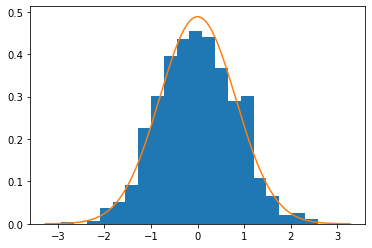

In [112]:
a = -10
b = 10

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 1000

def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

n = 50

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

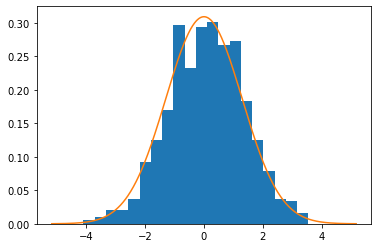

In [113]:
n = 20

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

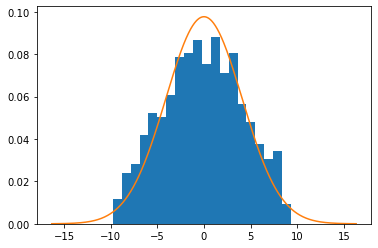

In [114]:
n = 2

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)